# Recommendtion System for Ecommerce Shop

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


In [2]:
#Importing the data
data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [3]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [4]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
#Shape of the data
data.shape

(2023070, 4)

In [6]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [15]:
#Check for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
dtype: int64

In [16]:
#Importing Seaborn - a visualization library
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

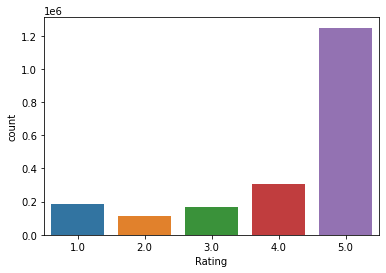

In [17]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [8]:
data

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [10]:
data.drop('Timestamp', inplace= True, axis= 1)
data

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [21]:
#Checking number of unique users
data['UserId'].nunique()
# data.ProductId.nunique()

1210271

In [13]:
#Reducing sample size
print(data.shape)
sample_data = data.sample(n=1000)
sample_data.shape

(2023070, 3)


(1000, 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

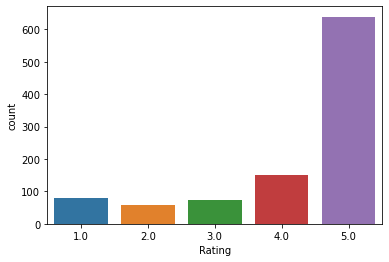

In [18]:
sns.countplot(x='Rating', data=sample_data)

In [56]:
# create a frequency table of users for each product
x1 = data.groupby("ProductId")['UserId'].agg("count")
x1

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
             ..
B00LORWRJA    1
B00LOS7MEE    1
B00LP2YB8E    1
B00LPVG6V0    1
B00LU0LTOU    1
Name: UserId, Length: 249274, dtype: int64

In [47]:
x1.shape

(249274, 2)

In [49]:
x1.describe()

,UserId
count,249274.000000
mean,8.115848
std,36.064113
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,7533.000000


<AxesSubplot:xlabel='UserId', ylabel='Count'>

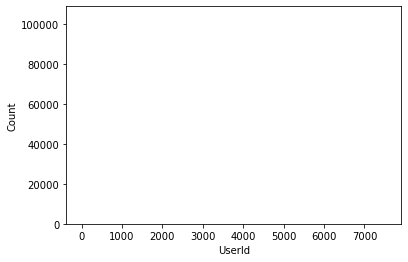

In [55]:
sns.histplot(x="UserId", data = x1)